# RED WINE QUALITY PREDICTION

## Importing Libreries

In [154]:
#Import libreries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn
import pickle

import warnings
warnings.filterwarnings("ignore")

Importing all neccessory Libreries

## Importing dataset

In [155]:
#Import the dataset

data= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Importing the dataset and see all columns with first five rows.

## Shape of data with number of rows and columns

In [156]:
data.shape

(1599, 12)

There are 1599 Rows and 12 Columns in dataset

## Detailed description

In [157]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We can see the detailed description of all the rows and columns like count, mean value, standard deviation, minimum and maximum value.

# Datatypes of all columns

In [158]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

We have Integer data type in quality. and rest are float, all are independent variable accept quality. quality is a target variable.

# Checking is there any null value

In [159]:
#check is there any null value present in any column

data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing value in whole dataset.
As we see no null values present, it's safe to preceed.

## EDA (Exploratory Data Analysis)

### Visualization (Uni Variate analysis)
Uni variate analysis works with only one variable, hence it is called uni variate.

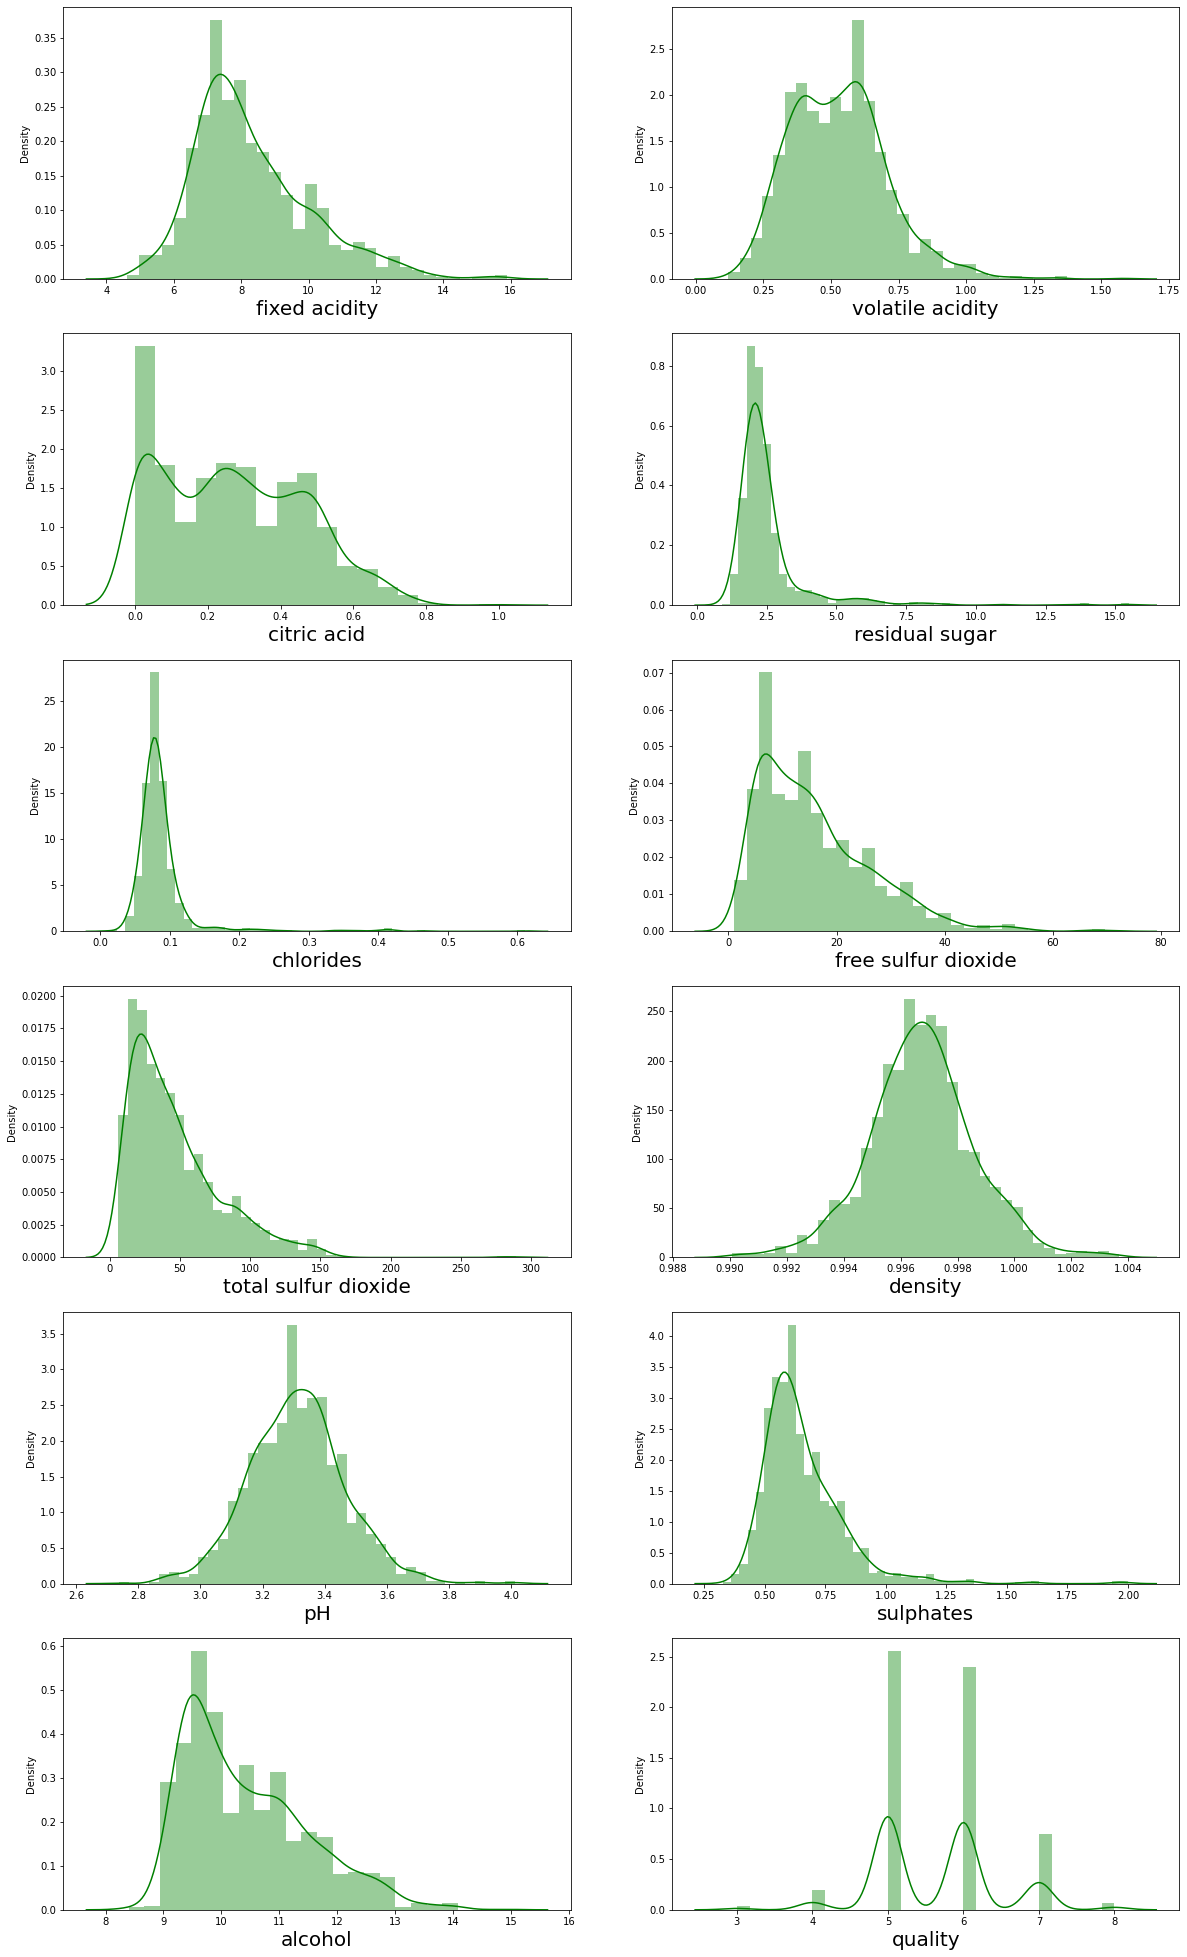

In [160]:
#Relationship Visualizing

plt.figure(figsize = (20,35), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <= 15: # as we see there are eight columns in the data
        ax = plt.subplot(6,2,plotnumber)
        sn.distplot(data[column], color = 'g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As shown in distplot almost every input variable is having skewness in it ().
Data columns are not normally distributed. So, we need remove skewness from all the input variable.

Quality is a targate variable and it is having multible classes. so, it is a multiclassification problem.

### Analysis through boxplot

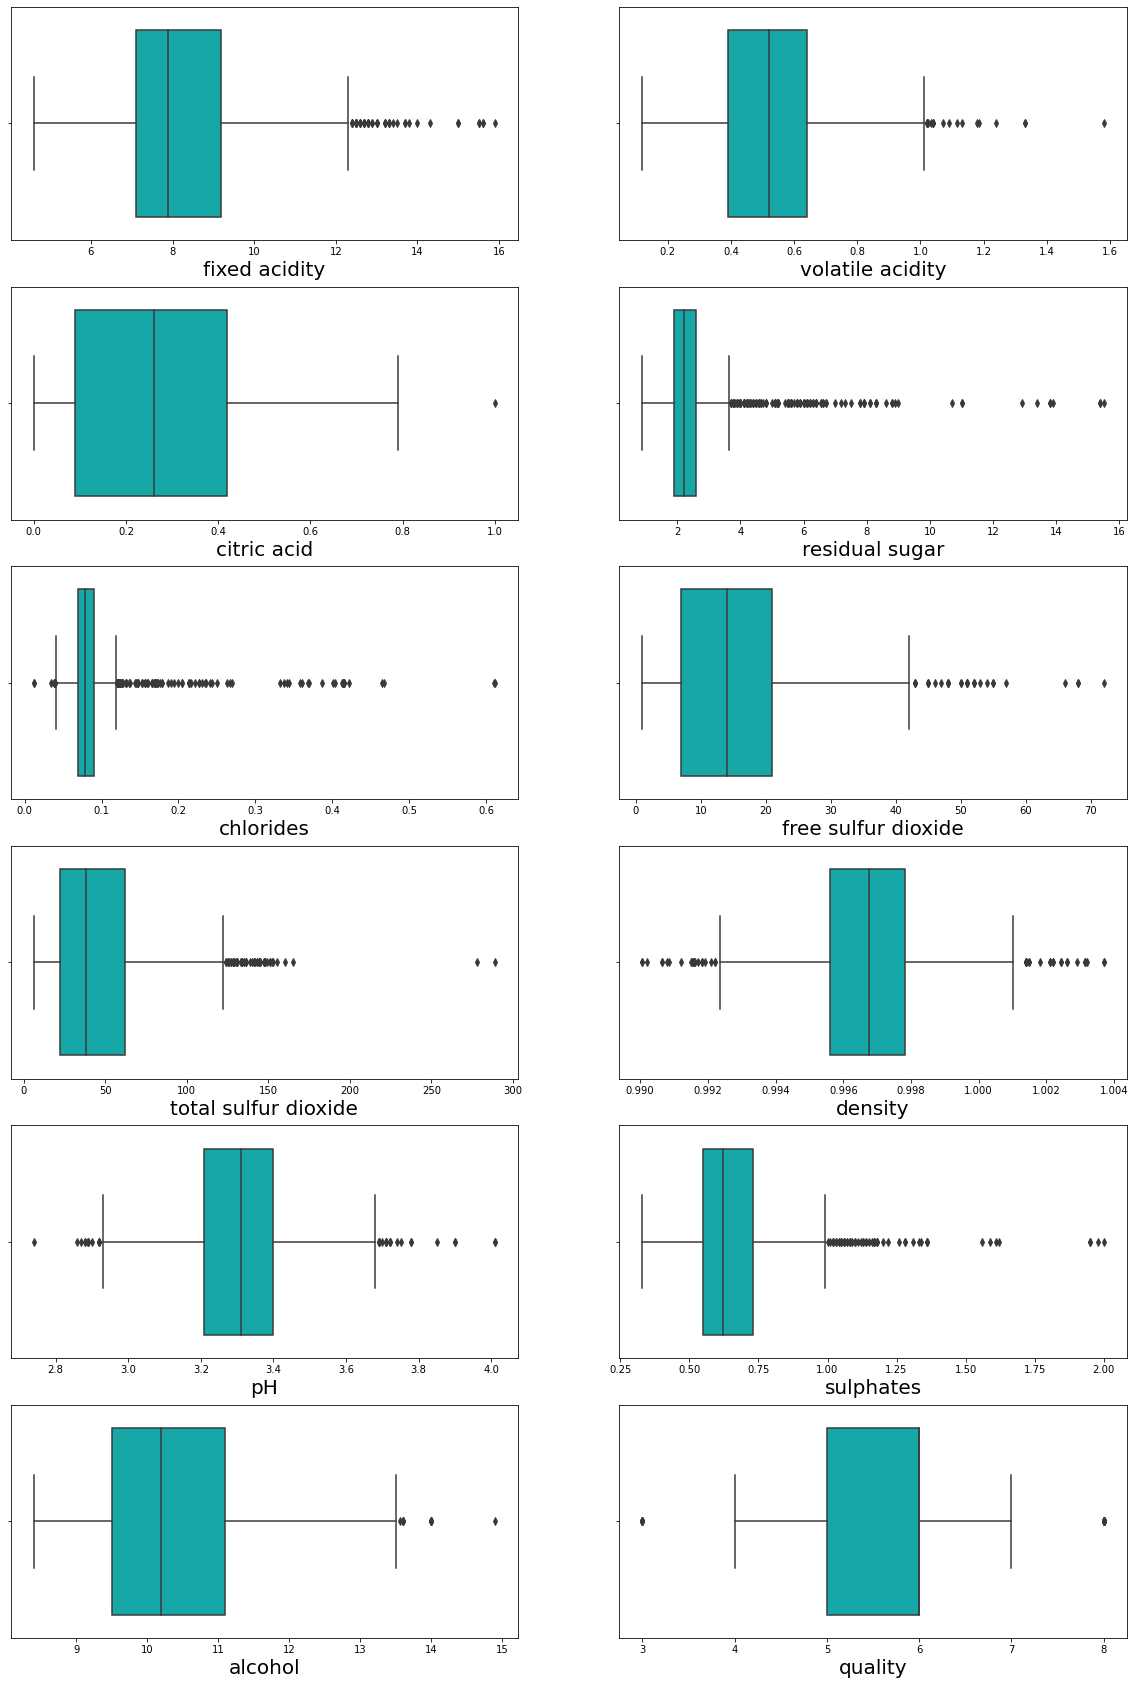

In [161]:
#Relationship Visualizing

plt.figure(figsize = (20,30), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <= 15: # as we see there are eight columns in the data
        ax = plt.subplot(6,2,plotnumber)
        sn.boxplot(data[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

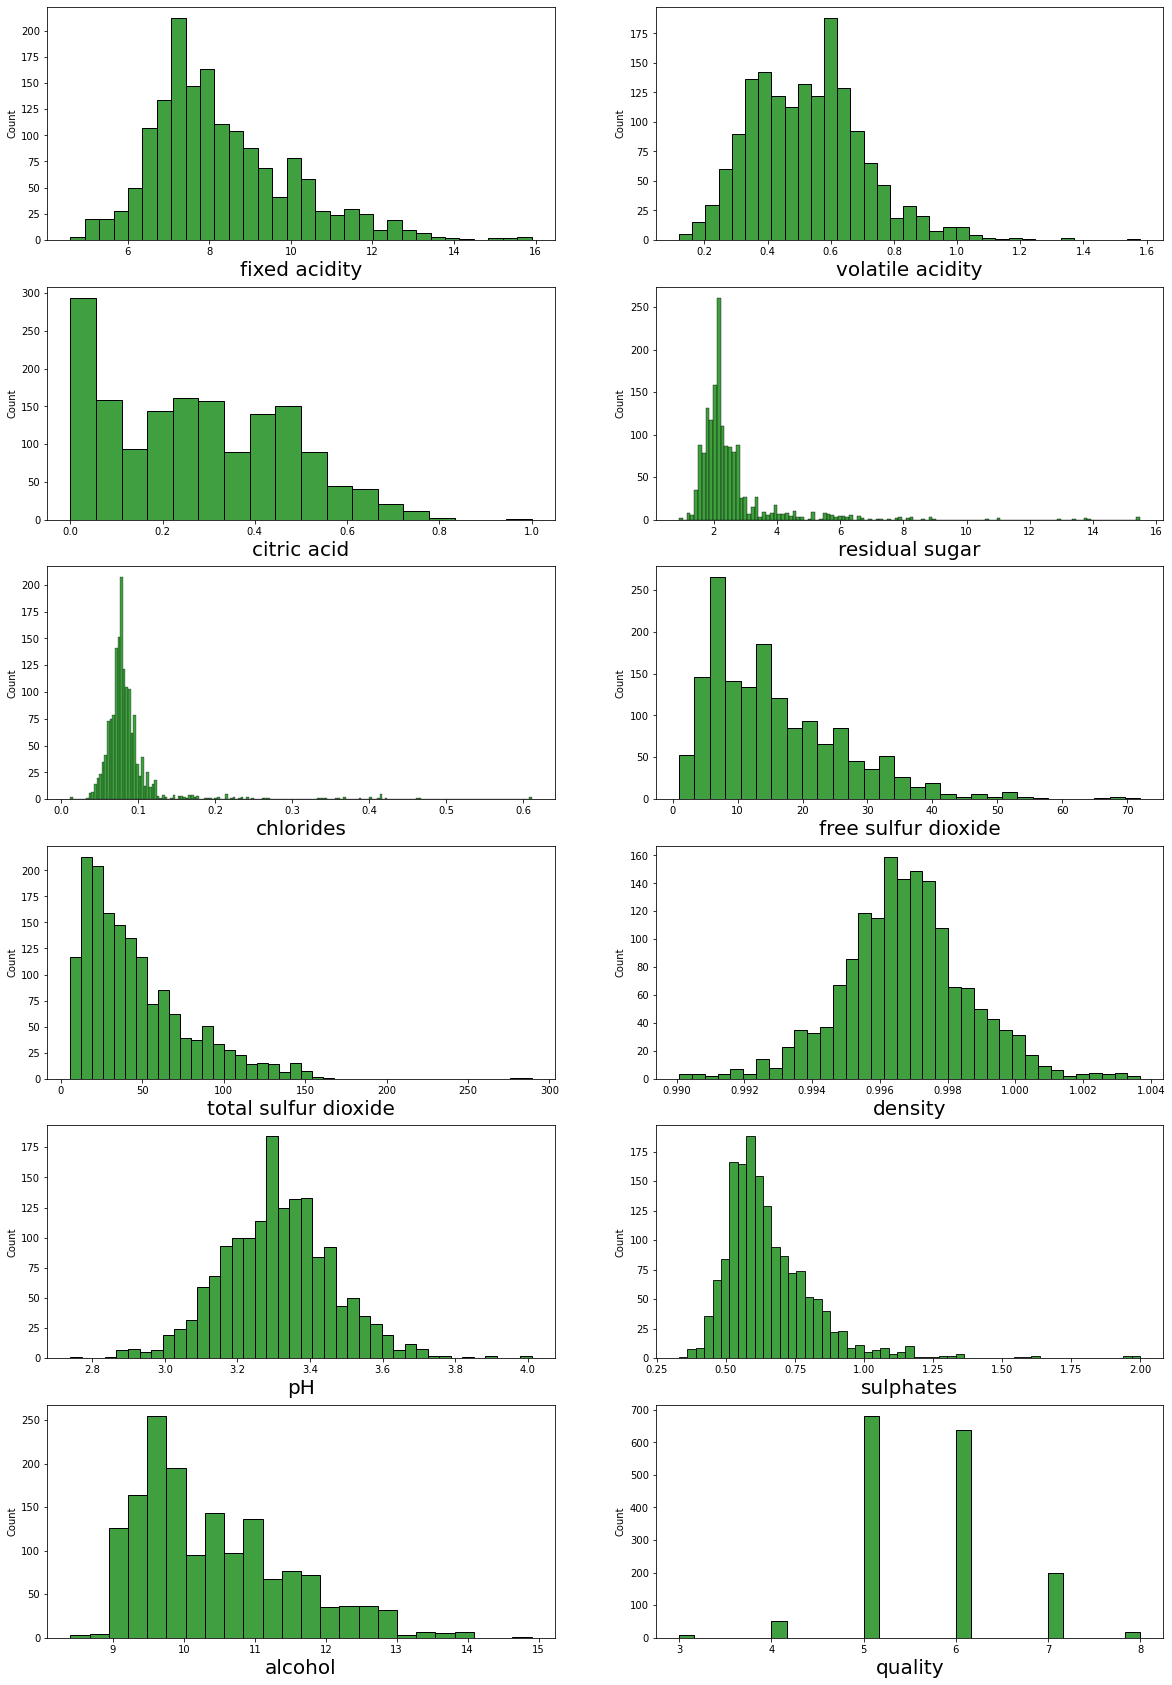

In [162]:
#Relationship Visualizing

plt.figure(figsize = (20,30), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <= 15: # as we see there are eight columns in the data
        ax = plt.subplot(6,2,plotnumber)
        sn.histplot(data[column], color = 'g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As shown in histplot almost every input variable is having skewness in it ().
Data columns are not normally distributed. So, we need remove skewness from all the input variable.

## Bi variate analysis
Bi variate analysis is works with two variables.

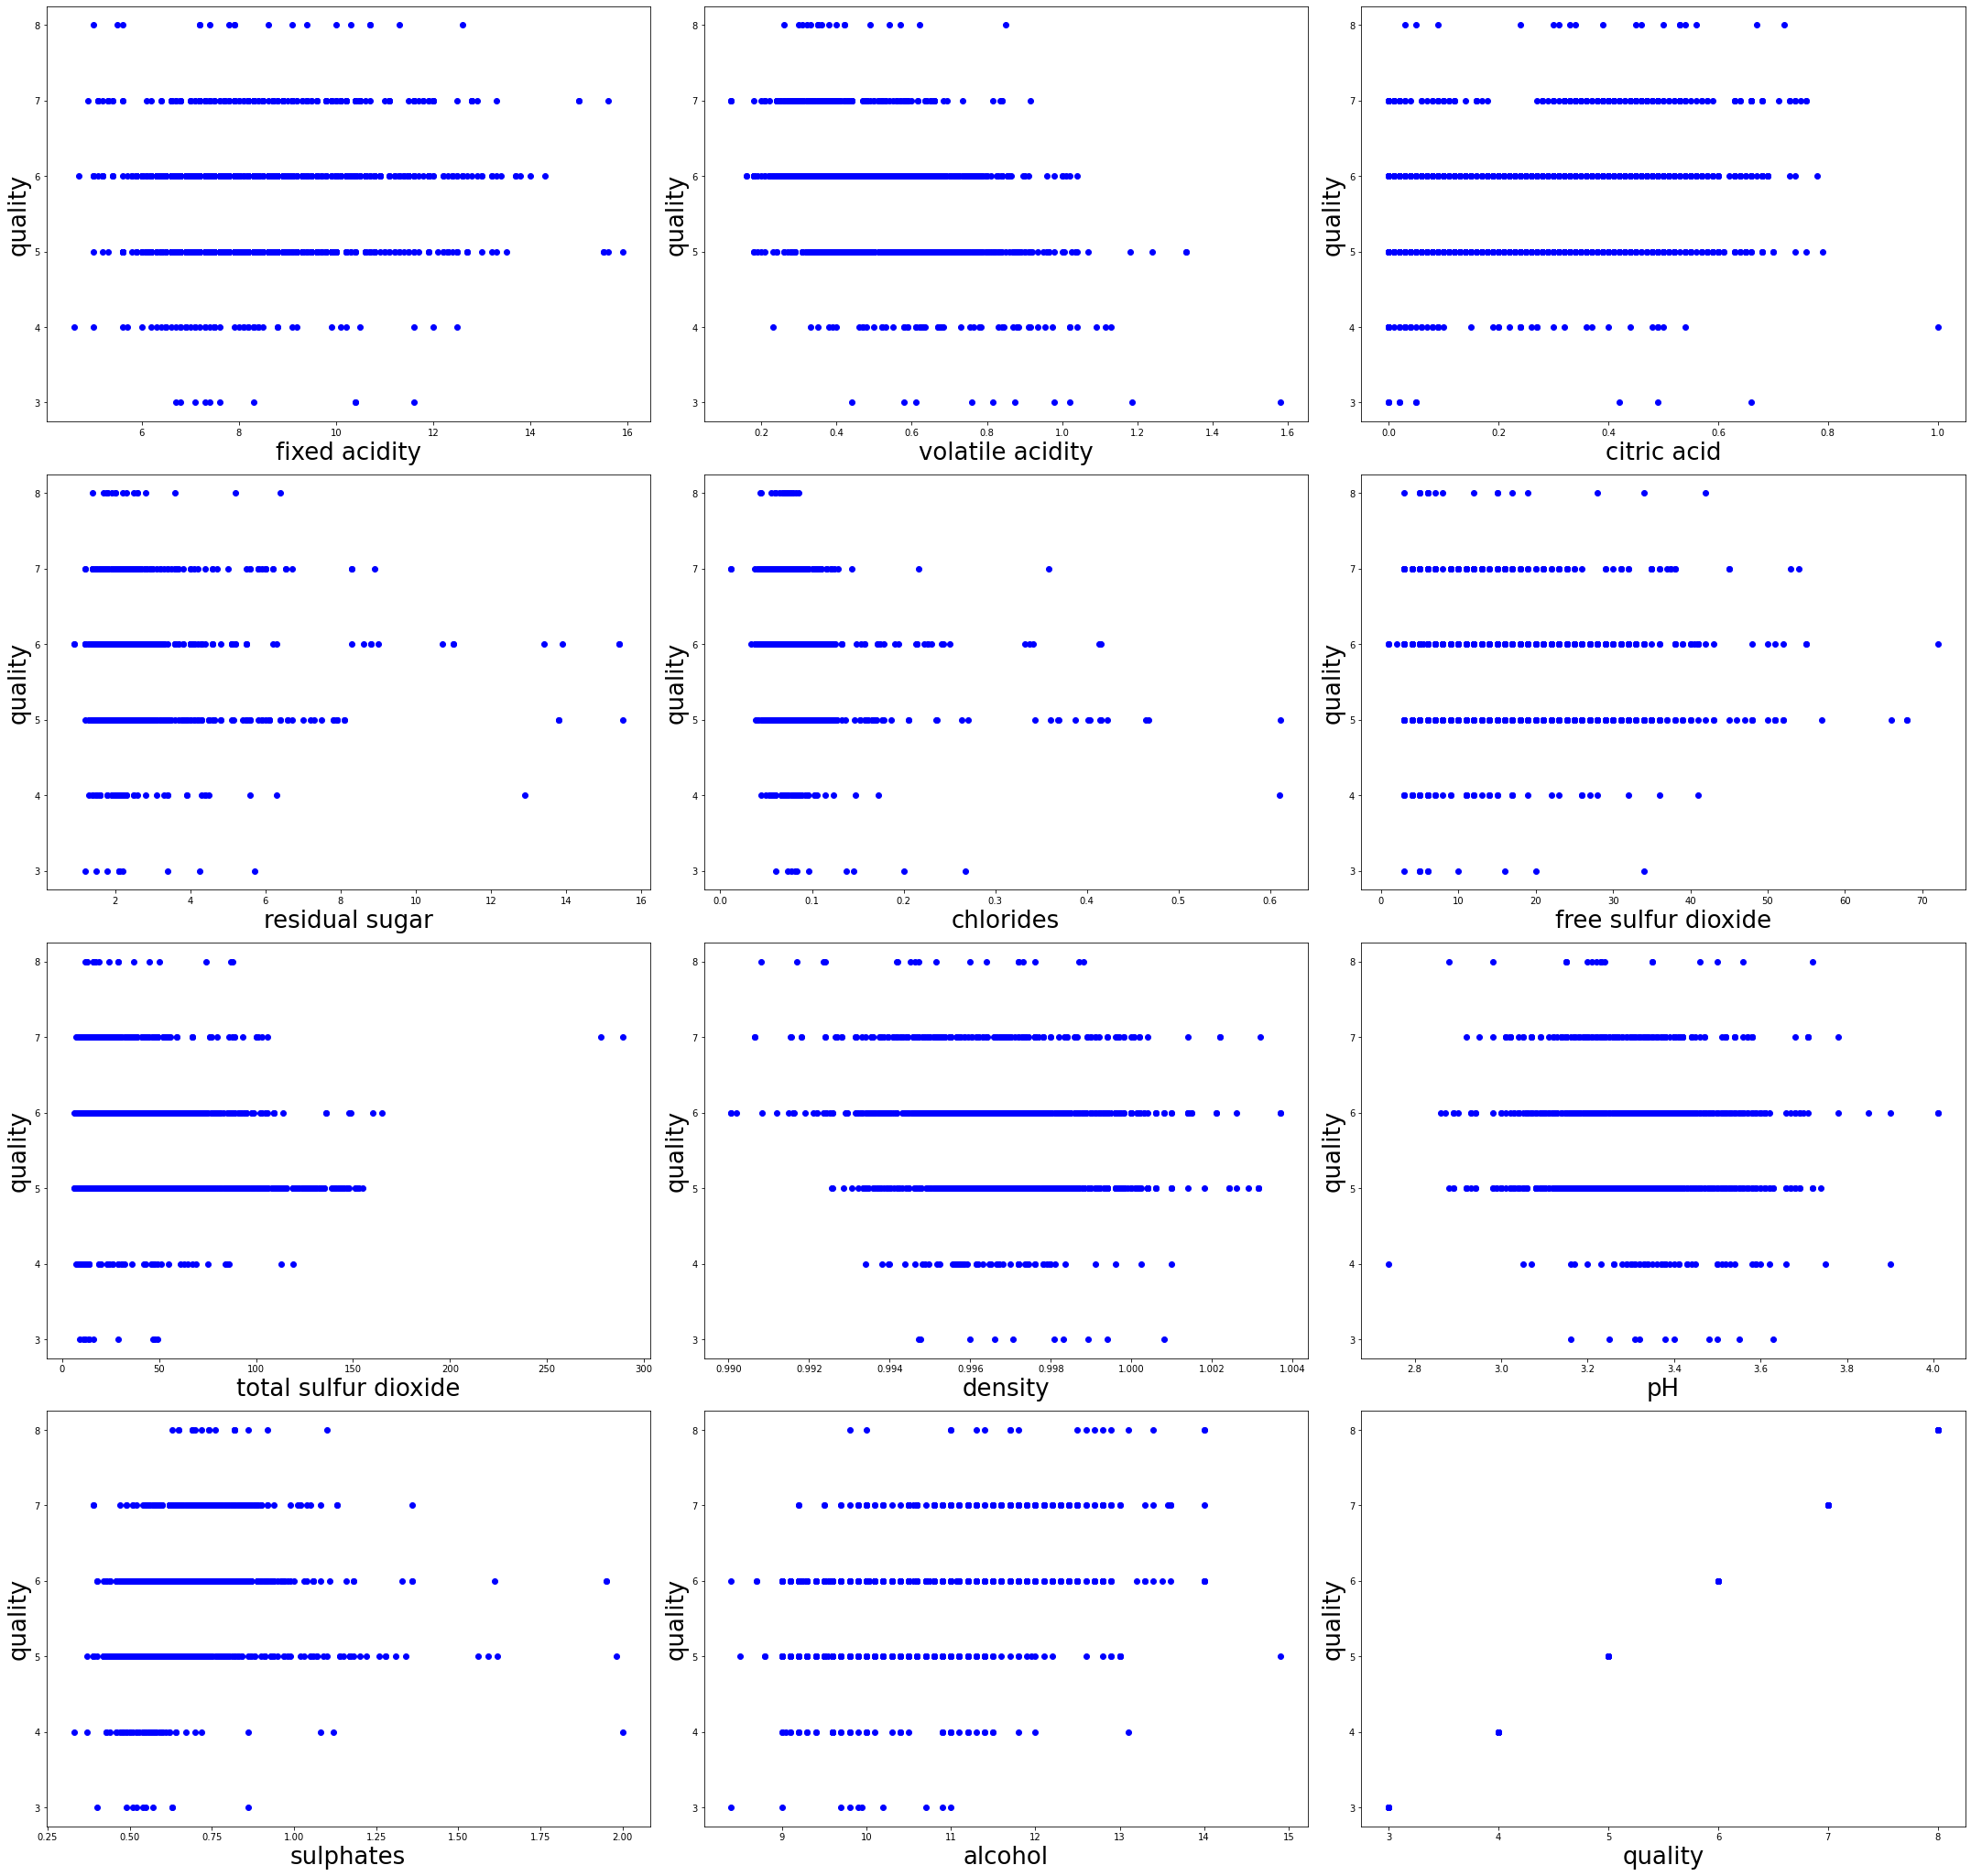

In [163]:
#Relationship Visualizing

plt.figure(figsize = (30,35), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(data[column],data['quality'], color='b')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('quality', fontsize=26)
    plotnumber += 1
plt.tight_layout()

As we have seen in the plot some outliers are also present in it.

## Multi Variate analysis
Multi variate analysis find the relationship with all variables.
Now we will visualize the data and check the coiefficient of multicollinearity

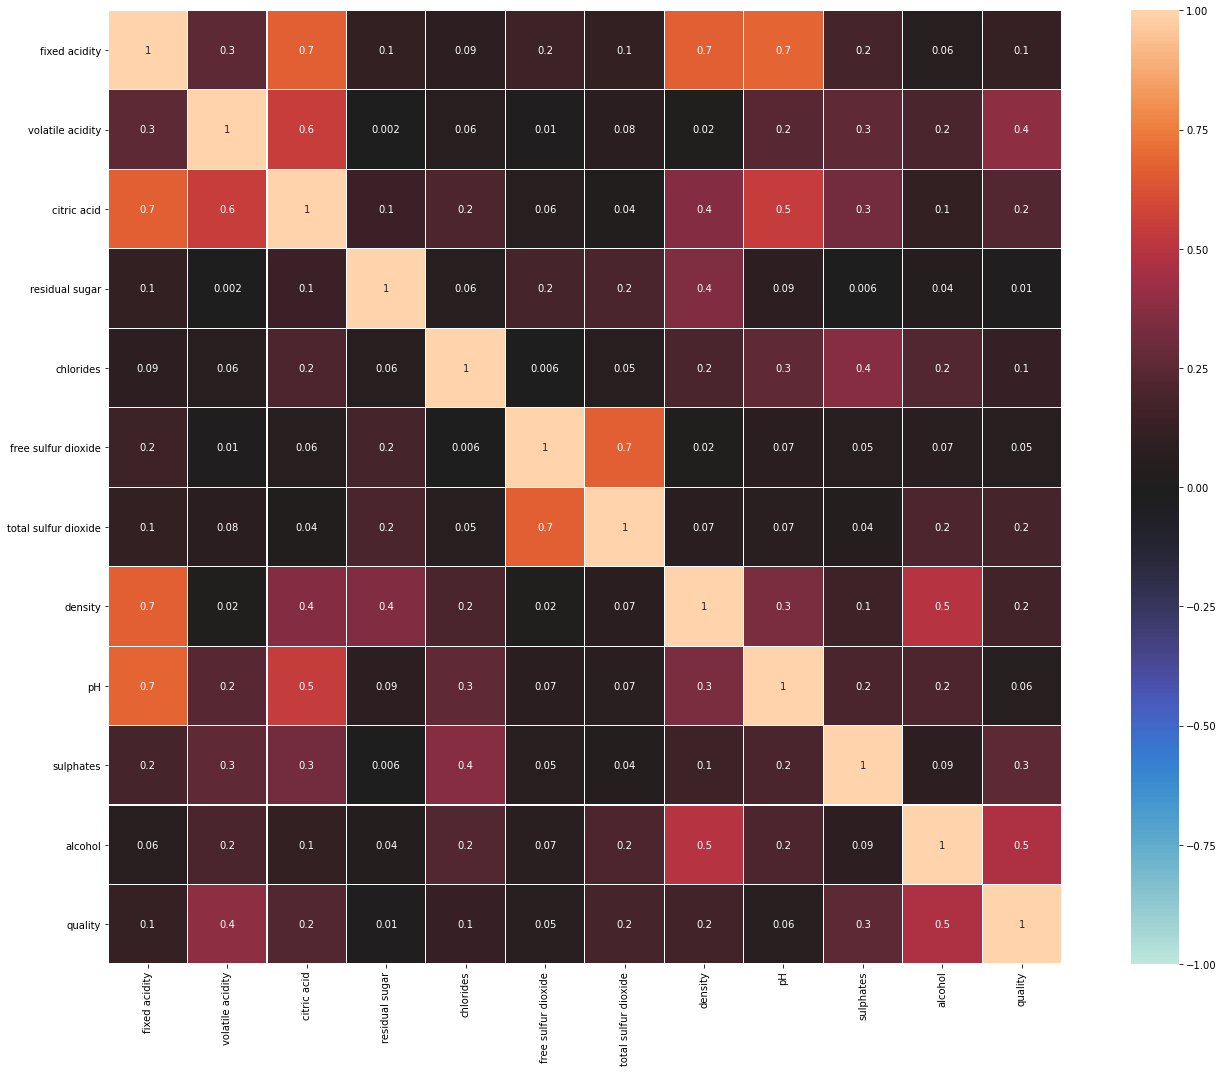

In [164]:
data_cor = data.corr().abs()

plt.figure(figsize = (20,15))
sn.heatmap(data_cor, vmin=-1, vmax= 1, annot=True, square=True,
          center=0, fmt='.1g', linewidths=.1)
plt.tight_layout()

As shown in plot 'volatile acidity ' and 'residual sugar' correlation value is in less (0.002).

##### Find out which columns are positively and negatively correlated with each other

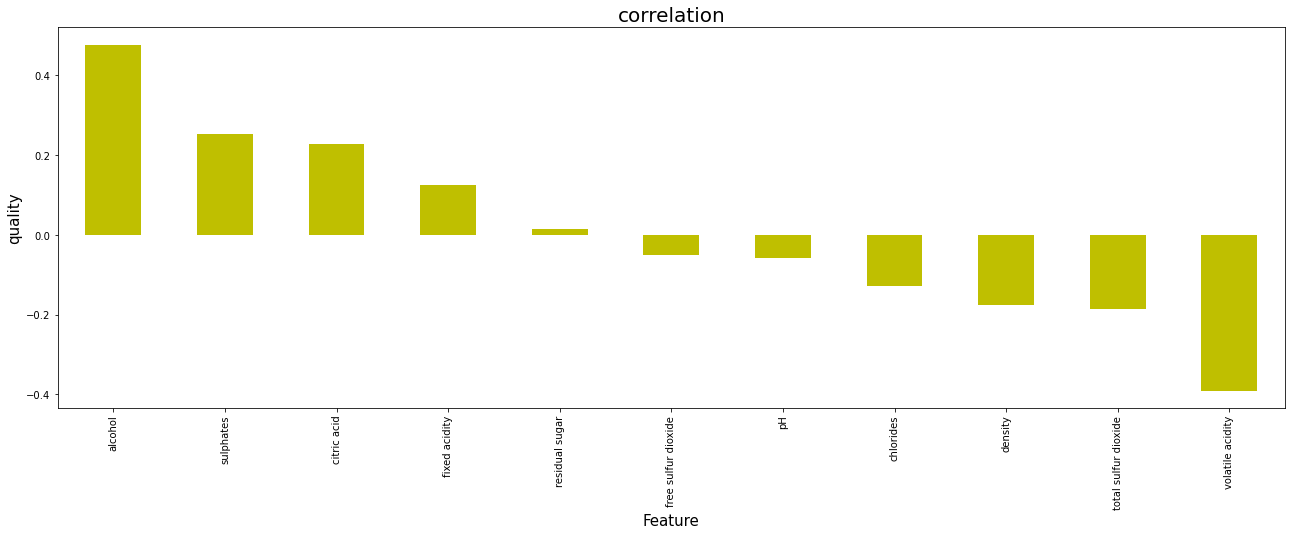

In [165]:
plt.figure(figsize=(22,7))
data.corr()['quality'].sort_values(ascending = False).drop(['quality']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('quality', fontsize = 15)
plt.title('correlation', fontsize = 20)
plt.show()

as we have saw in the plot residual suager and target variable is having very less correlation with each other. 

#### After visualization conclude that all input variables are having some/good amount relationship with target variable. Now proceed futher for next steps:

# Remove outliers 
Now we found the outliers and skewness in some variables.Removing outliers first.

## 1.Outlier removal using Zscore

In [166]:
#In Zscore technique taking standard deviation 3
#for Zscore outlier removal technique import library from scipy


from scipy.stats import zscore

z_score= zscore(data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)

new_data = data[filtering_entry]

print("shape before and after")
print("shape before".ljust(20),":", data.shape)
print("shape after".ljust(20),":", new_data.shape)
print("Percentage Loss".ljust(20),":", (data.shape[0]-new_data.shape[0])/data.shape[0])

shape before and after
shape before         : (1599, 12)
shape after          : (1458, 12)
Percentage Loss      : 0.08818011257035648


8.818% data loss after using Zscore technique

91.181% data remains.

In [167]:
new_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,8.312551,0.524050,0.265281,2.388717,0.081531,15.089849,43.660494,0.996718,3.316152,0.642414,10.417798,5.646776
std,1.647635,0.169451,0.191271,0.865307,0.021218,9.317669,29.414615,0.001718,0.141052,0.129753,1.021649,0.801119
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.315000,0.620000,10.200000,6.000000
75%,9.200000,0.635000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,8.000000


## 2. Outlier Removing using IQR

### from boxplot in EDA, we came to know that outliers present in following columns.

#### Visualize data again to check outliers are present at low side or high side 

In [168]:
data2 = data

In [169]:
#features in which outliers are detected
fe = data2[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide","total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]

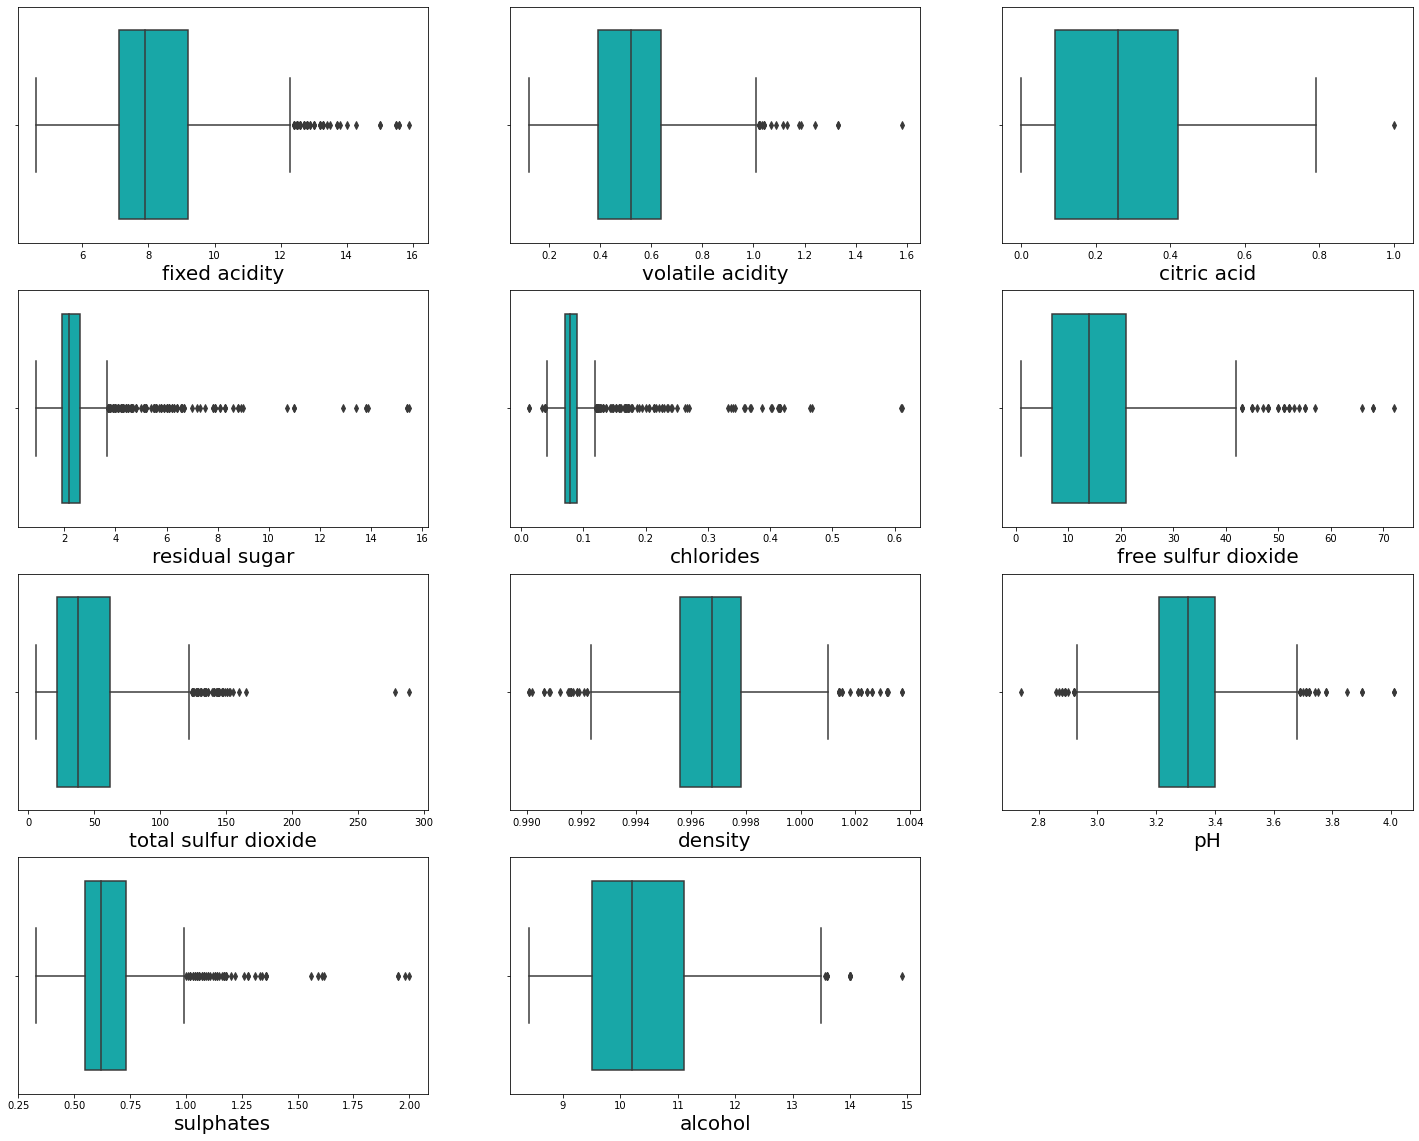

In [170]:
plt.figure(figsize=(25,20))
graph = 1

for column in fe:
    if graph <= 30:
        ax = plt.subplot(4,3, graph)
        sn.boxplot(fe[column], color = 'c')
        plt.xlabel(column, fontsize = 20)
        
    graph+=1
plt.show()

In [171]:
#find the IQR (Inter Quantile Range) to identify outliers
#formula for finding IQR

#1st quantile 25%
q1 = data2.quantile(0.25)

#3rd quantile 75%
q3 = data2.quantile(0.75)

#IQR = Inter Quantile Range
iqr = q3-q1

In [172]:
data2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Outlier detection formula 

#### Higher side ==> Q3 + (1.5 * IQR)
#### Lower side ==> Q1 - (1.5 * IQR) 

##### Outliers removal from higher side 

In [173]:
#as shown in boxplot we have outlier in higher side of fixed acidity also
#Remove outliers from higher side so, use higher side formula

fixaci_out = (9.200000 + (1.5*(9.200000 - 7.100000)))
fixaci_out

12.349999999999998

In [174]:
index_out = np.where(data2['fixed acidity'] > fixaci_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1546,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1547,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1548,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from fixed acidity 1550 rows will remains in dataframe. 

In [175]:
#as shown in boxplot we have outlier in higher side of volatile acidity also
#Remove outliers from higher side so, use higher side formula

volaci_out = (0.640000 + (1.5*(0.640000 - 0.390000)))
volaci_out

1.0150000000000001

In [176]:
index_out = np.where(data2['volatile acidity'] > volaci_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1527,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1528,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1529,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from volatile acidity 1531 rows will remains in dataframe. 

In [177]:
#as shown in boxplot we have outlier in higher side of citric acidity also
#Remove outliers from higher side so, use higher side formula

citaci_out = (0.420000 + (1.5*(0.420000 - 0.090000)))
citaci_out

0.9149999999999999

In [178]:
index_out = np.where(data2['citric acid'] > citaci_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1526,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1527,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1528,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from citric acid 1530 rows will remains in dataframe. 

In [179]:
#as shown in boxplot we have outlier in higher side of residual sugar also
#Remove outliers from higher side so, use higher side formula

suger_out = (2.600000 + (1.5*(2.600000 - 1.900000)))
suger_out

3.6500000000000004

In [180]:
index_out = np.where(data2['residual sugar'] > suger_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1388,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1389,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1390,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from residual suger 1392 rows will remains in dataframe. 

In [181]:
#as shown in boxplot we have outlier in higher side of chlorides also
#Remove outliers from higher side so, use higher side formula

chlorides_out = (q3.chlorides + (1.5*(iqr.chlorides)))
chlorides_out

0.11999999999999998

In [182]:
index_out = np.where(data2['chlorides'] > chlorides_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1307,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1308,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1309,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from cloride 1311 rows will remains in dataframe. 

In [183]:
#Check the Outliers for chlorides
#Remove outliers from lower side so, use lower side formula

chlorides_out = (q1.chlorides - (1.5*(iqr.chlorides)))
chlorides_out

0.04000000000000002

In [184]:
index_out = np.where(data2['chlorides'] < chlorides_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1298,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1299,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1300,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from cloride 1302 rows will remains in dataframe. 

In [185]:
#as shown in boxplot we have outlier in higher side of free sulfur dioxide also
#Remove outliers from higher side so, use higher side formula

sulfur_out = (21.000000 + (1.5*(21.000000 - 7.000000)))
sulfur_out

42.0

In [186]:
index_out = np.where(data2['free sulfur dioxide'] > sulfur_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1282,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1283,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1284,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from free sulfur dioxide 1286 rows will remains in dataframe. 

In [187]:
#as shown in boxplot we have outlier in higher side of total sulfur dioxide also
#Remove outliers from higher side so, use higher side formula

total_out = (62.000000 + (1.5*(62.000000 - 22.000000)))
total_out

122.0

In [188]:
index_out = np.where(data2['total sulfur dioxide'] > total_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1246,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1247,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1248,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from total sulfur dioxide 1250 rows will remains in dataframe. 

In [189]:
#as shown in boxplot we have outlier in higher side of density also
#Remove outliers from higher side so, use higher side formula

density_out = (q3.density + (1.5*(iqr.density)))
density_out

1.0011875

In [190]:
index_out = np.where(data2['density'] > density_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1246,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1247,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1248,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from density 1250 rows will remains in dataframe. 

In [191]:
#as shown in boxplot we have outlier in lower side of density also
#Remove outliers from lower side so, use lower side formula

density_out = (q1.density - (1.5*(iqr.density)))
density_out

0.9922475000000001

In [192]:
index_out = np.where(data2['density'] < density_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1231,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1232,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1233,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from density 1235 rows will remains in dataframe. 

In [193]:
#as shown in boxplot we have outlier in lower side of pH 
#Remove outliers from lower side so, use lower side formula

pH_out = (q1.pH - (1.5*(iqr.pH)))
pH_out

2.925

In [194]:
index_out = np.where(data2['pH'] < pH_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1227,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1228,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1229,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from pH 1231 rows will remains in dataframe. 

In [195]:
#as shown in boxplot we have outlier in higher side of pH 
#Remove outliers from lower side so, use higher side formula

pH_out = (q3.pH + (1.5*(iqr.pH)))
pH_out

3.6849999999999996

In [196]:
index_out = np.where(data2['pH'] > pH_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1212,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1213,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1214,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from pH 1216 rows will remains in dataframe. 

In [197]:
#as shown in boxplot we have outlier in higher side of sulphates 
#Remove outliers from lower side so, use higher side formula

sulphates_out = (q3.sulphates + (1.5*(iqr.sulphates)))
sulphates_out

0.9999999999999999

In [198]:
index_out = np.where(data2['sulphates'] > sulphates_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1192,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1193,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1194,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from sulphates 1196 rows will remains in dataframe. 

In [199]:
#as shown in boxplot we have outlier in higher side of alcohol 
#Remove outliers from lower side so, use higher side formula

alcohol_out = (q3.alcohol + (1.5*(iqr.alcohol)))
alcohol_out

13.5

In [200]:
index_out = np.where(data2['alcohol'] > alcohol_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1190,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1191,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1192,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from alcohol 1194 rows will remains in dataframe. 

#### After removing outliers using IQR technique there are 2101 rows will remains in dataset.
Now, find how much data loss in IQR method

74.68% data remains after removing outliers using IQR technique

25.32% data loss in IQR method

### After applying Zscore and IQR technique to remove outliers. We conclude that less amount data will loss in Zscore technique so we will go with Zscore technique 

## Check the skewness and remove that

In [201]:
new_data.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                 0.248823
dtype: float64

As we see there are some variables are skewed, whoes value is not lies between -0.5 to +0.5 this range.

fixed acidity, 
residual suger,
chlorides,
free sulfur dioxide,
total sulfur dioxide,
sulphates
alcohol                 

### Check outliers datatype. If data types of skewed column is integer (catogorical) than no need to remove skewness from that variable.

In [202]:
new_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Apply Log transformation to remove skewness

In log transformation, we will take the log of Continues skewed data and convert that into normal data(distribution)/less skewed data and in power transformation we will take the mean value in place of 0th value.

In [203]:
#applying log transformation on skewed columns

new_data['fixed acidity'] = np.log(new_data['fixed acidity'])
new_data['residual sugar'] = np.log(new_data['residual sugar'])
new_data['chlorides'] = np.log(new_data['chlorides'])
new_data['free sulfur dioxide'] = np.log(new_data['free sulfur dioxide'])
new_data['total sulfur dioxide'] = np.log(new_data['total sulfur dioxide'])
new_data['sulphates'] = np.log(new_data['sulphates'])
new_data['alcohol'] = np.log(new_data['alcohol'])

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

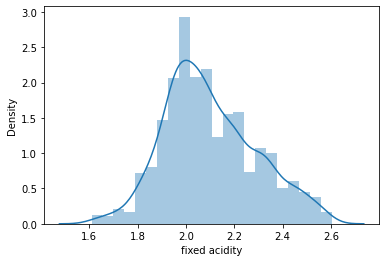

In [204]:
sn.distplot(new_data['fixed acidity'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

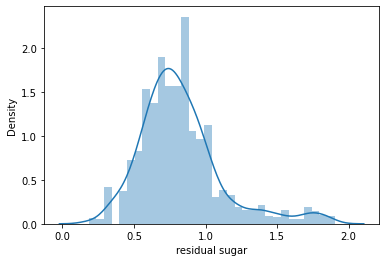

In [205]:
sn.distplot(new_data['residual sugar'])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

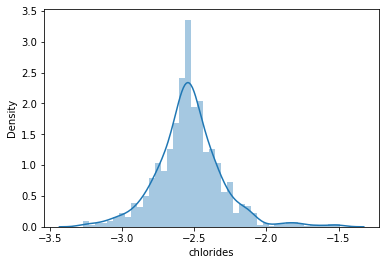

In [206]:
sn.distplot(new_data['chlorides'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

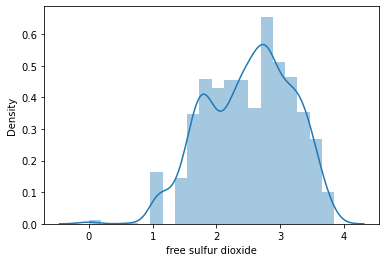

In [207]:
sn.distplot(new_data['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

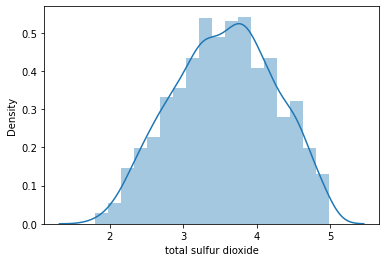

In [208]:
sn.distplot(new_data['total sulfur dioxide'])

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

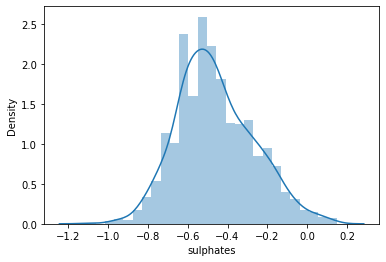

In [209]:
sn.distplot(new_data['sulphates'])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

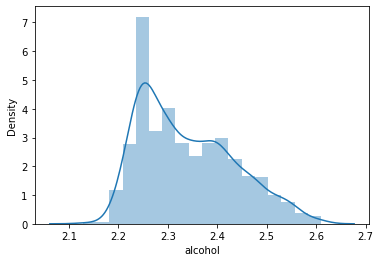

In [210]:
sn.distplot(new_data['alcohol'])

##### As shown in plot skewness removes after using log transformation skewness removal technique.

## Seperating the columns into featuers and target:

#### X= features, y=Target 

In [211]:
x = new_data.drop(columns = 'quality', axis=1)
y = new_data['quality']

## Scalling technique

In [212]:
#import Libraries
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scaled = ss.fit_transform(x)

variables are scaled now using standard scaler technique.

## Variance inflation factor

In [213]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,7.970581,fixed acidity
1,1.842977,volatile acidity
2,3.069527,citric acid
3,1.773929,residual sugar
4,1.233243,chlorides
5,2.863860,free sulfur dioxide
6,3.161391,total sulfur dioxide
7,6.714040,density
8,3.365932,pH
9,1.354603,sulphates


as we have saw in the table vif value is greater than 5 for two columns, so drop maximum value column to avoid multiclinearity issue.

In [214]:
new_data=new_data.drop(['fixed acidity'], axis=1)

In [215]:
x = new_data.drop(columns = 'quality', axis=1)
y = new_data['quality']

In [216]:
ss = StandardScaler()
x_scalar = ss.fit_transform(x)

In [217]:

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,1.842651,volatile acidity
1,2.800593,citric acid
2,1.543204,residual sugar
3,1.224869,chlorides
4,2.824036,free sulfur dioxide
5,3.040549,total sulfur dioxide
6,2.770078,density
7,1.532585,pH
8,1.339466,sulphates
9,2.413445,alcohol


after dropping column we can seen the value of vif is decreases, so multicolinearity issue will not occurs.

## Finding best random state 

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [219]:
from sklearn.tree import DecisionTreeClassifier
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=i)
    mod= DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "on Random_state ", maxRS)

Best accuracy is  0.6529680365296804 on Random_state  125


In [220]:
x_train,x_test,y_train,y_test = train_test_split(x_scalar, y, test_size=0.2, random_state = 90)

## 1.Logistic Regression Model

In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Log_reg =LogisticRegression()
Log_reg.fit(x_train, y_train)

LogisticRegression()

In [232]:
pred_test=Log_reg.predict(x_test)

In [233]:
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.6438356164383562
[[ 0  0  3  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0 91 29  0  0]
 [ 0  0 33 82  2  0]
 [ 0  0  3 27 15  0]
 [ 0  0  0  1  0  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         6
           5       0.67      0.76      0.71       120
           6       0.59      0.70      0.64       117
           7       0.88      0.33      0.48        45
           8       0.00      0.00      0.00         1

    accuracy                           0.64       292
   macro avg       0.36      0.30      0.31       292
weighted avg       0.65      0.64      0.62       292



In [234]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(Log_reg, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5754460292802334

###### The Accuracy score for logistic regression model is : 64.383
###### Cross validation score for logistic regression is : 57.544

## 2.Random forest Classifier

In [225]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters ={'criterion':['gini', 'entropy'], 'max_features':["auto","sqrt","log2"]}
Rfr= RandomForestClassifier()
clf =GridSearchCV(Rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'auto'}


In [227]:
Rfr =RandomForestClassifier(criterion = "gini", max_features="auto")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = accuracy_score(y_test,pred_decision)
print('accuracy score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x, y, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

accuracy score:  70.2054794520548
Cross Val Score:  57.750342935528124


###### The Accuracy score for Random Forest Classifier model is : 70.20%
###### Cross validation score for Random Forest Classifier is : 57.75%

## 3.Decision Tree Classifier

In [235]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [237]:
pred_DT = DT.predict(x_test)
print(accuracy_score(y_test,pred_DT))

0.5924657534246576


In [238]:
print(confusion_matrix(y_test,pred_DT))
print(classification_report(y_test,pred_DT))

[[ 0  0  2  1  0  0]
 [ 0  0  4  2  0  0]
 [ 0  1 82 33  3  1]
 [ 1  3 36 69  6  2]
 [ 0  0  4 18 21  2]
 [ 0  0  0  0  0  1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         6
           5       0.64      0.68      0.66       120
           6       0.56      0.59      0.57       117
           7       0.70      0.47      0.56        45
           8       0.17      1.00      0.29         1

    accuracy                           0.59       292
   macro avg       0.34      0.46      0.35       292
weighted avg       0.60      0.59      0.59       292



In [239]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(DT, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.4711905098149979

###### The Accuracy score for Decision tree Classifier model is : 59.24%
###### Cross validation score for Decision tree Classifier is : 47.11%

## 4.Support vector Classifier

In [240]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(x_train, y_train)

SVC()

In [241]:
pred_sv = sv.predict(x_test)
print(accuracy_score(y_test,pred_sv))

0.6746575342465754


In [242]:
print(confusion_matrix(y_test,pred_sv))
print(classification_report(y_test,pred_sv))

[[  0   0   3   0   0   0]
 [  0   0   4   2   0   0]
 [  0   0 102  18   0   0]
 [  0   0  35  80   2   0]
 [  0   0   2  28  15   0]
 [  0   0   0   1   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         6
           5       0.70      0.85      0.77       120
           6       0.62      0.68      0.65       117
           7       0.88      0.33      0.48        45
           8       0.00      0.00      0.00         1

    accuracy                           0.67       292
   macro avg       0.37      0.31      0.32       292
weighted avg       0.67      0.67      0.65       292



In [244]:
cv_score= cross_val_score(sv, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5397519182789624

###### The Accuracy score for SVC model is : 67.46%
###### Cross validation score for SVC is : 53.97%

## Comparison of all model

     Algorithms            Accuracy score    Cross validation   Difference
1.	Logistic Regression	         64.38%   	   57.54%	        6.83%
2.	Random forest Classifier	 70.20%	       57.75%	        12.45%
3.	Decision Tree	             59.24%	       47.11%	        12.12%
4.	SVC                          67.46%	       53.97%	        13.49%


### as shown in above table Logistic degression is having minimum difference, so Logistic Regression is best model

## Hyper parameter tunning

In [266]:
#Logistic Regression

Parameters = {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
              'C' : [1, 10, 0.1]}

In [267]:
GCV=GridSearchCV(LogisticRegression(),Parameters,cv=5)

In [268]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 0.1],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [269]:
GCV.best_params_ # printing the best parameters found by GridSearchCV

{'C': 1, 'penalty': 'none', 'solver': 'lbfgs'}

In [270]:
mod = LogisticRegression( C=1, penalty='none', solver='lbfgs')

mod.fit(x_train, y_train)
pred =mod.predict(x_test)
print(accuracy_score(y_test, pred)*100)

63.35616438356164


after hyper parameter tunning accuracy score is: 63.35%

In [280]:
new_data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

## ROC AUC curve to choose best model

In [272]:
# plot ROC/AUC for multiple models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [273]:
lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sv = SVC()

In [275]:
#train all classifiers
lr.fit(x_train, y_train)
rf.fit(x_train, y_train)
dt.fit(x_train, y_train)
sv.fit(x_train, y_train)

print("Now all models are trained")

Now all models are trained


In [276]:
#All model score captured

lr.score(x_train, y_train)
rf.score(x_train, y_train)
dt.score(x_train, y_train)
sv.score(x_train, y_train)

print("all model test score captured")

all model test score captured


## find ROC AUC Score

In [277]:
#logistic Regression
roc_auc_score(y_test, lr.predict(x_test))

ValueError: multi_class must be in ('ovo', 'ovr')

In [ ]:
# Random Forest Classifier
roc_auc_score(y_test, rf.predict(x_test))

In [ ]:
#Decision Tree Classifier
roc_auc_score(y_test, dt.predict(x_test))

In [ ]:
#SVC
roc_auc_score(y_test, sv.predict(x_test))

## Saving the model 

In [282]:
import joblib
joblib.dump(mod,"RedWineQuality.pkl")

['RedWineQuality.pkl']

## Loding model

In [284]:
model = joblib.load("RedWineQuality.pkl")

In [286]:
prediction = model.predict(x_test)

In [287]:
prediction=pd.DataFrame(prediction)
#converted into data frame

In [288]:
prediction.to_csv('Results.csv', index = False)
#prediction saving